In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
#For Amazon Dataset
#1- What is the average rating for each product category?

In [85]:
import pandas as pd

df = pd.read_csv("amazon.csv")

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

# Calculate the average rating for each category
average_ratings = df.groupby('category')['rating'].mean().reset_index()

print(average_ratings)


                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


In [86]:
#2- What are the top rating_count products by category?

In [87]:
import pandas as pd

df = pd.read_csv("amazon.csv")


df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df = df.dropna(subset=['rating_count', 'category'])
df['rating_count'] = df['rating_count'].astype(int)

# Identify the top product in each category by rating_count
top_products = df.loc[df.groupby('category')['rating_count'].idxmax()]

# Select relevant columns for display
top_products = top_products[['category', 'product_id', 'product_name', 'rating_count', 'rating']]

# Sort by category for clarity
top_products = top_products.sort_values(by='category')

print(top_products)

                                               category  product_id  \
900   Computers&Accessories|Accessories&Peripherals|...  B09F3PDDRF   
32    Computers&Accessories|Accessories&Peripherals|...  B08QSC1XY8   
743   Computers&Accessories|Accessories&Peripherals|...  B0BBMPH39N   
653   Computers&Accessories|Accessories&Peripherals|...  B0B9LDCX89   
940   Computers&Accessories|Accessories&Peripherals|...  B09GBBJV72   
...                                                 ...         ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...  B08L12N5H1   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  B0B7FJNSZR   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  B09BL2KHQW   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...  B095X38CJS   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...  B099S26HWG   

                                           product_name  rating_count rating  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...           81

In [88]:
#3- What is the distribution of discounted prices vs. actual prices?

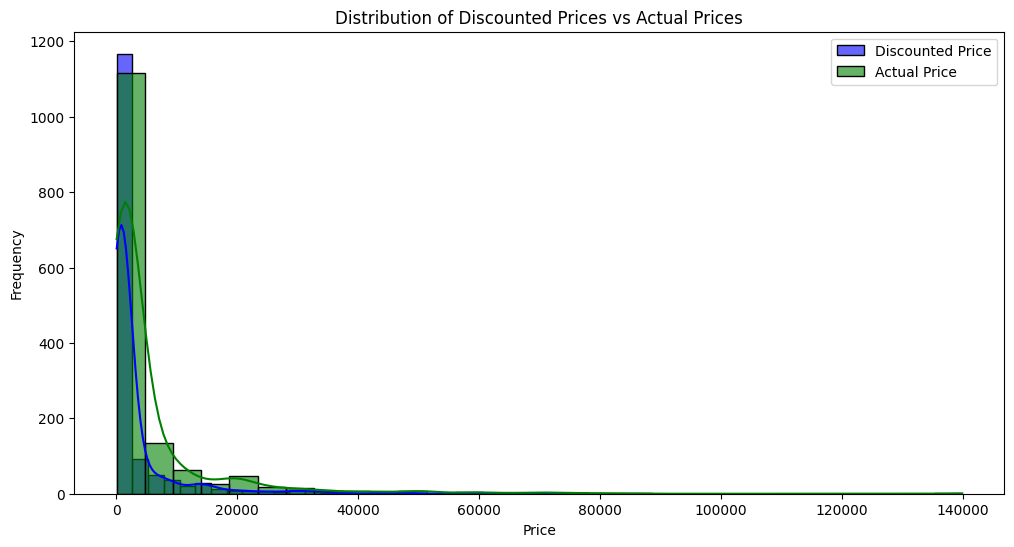

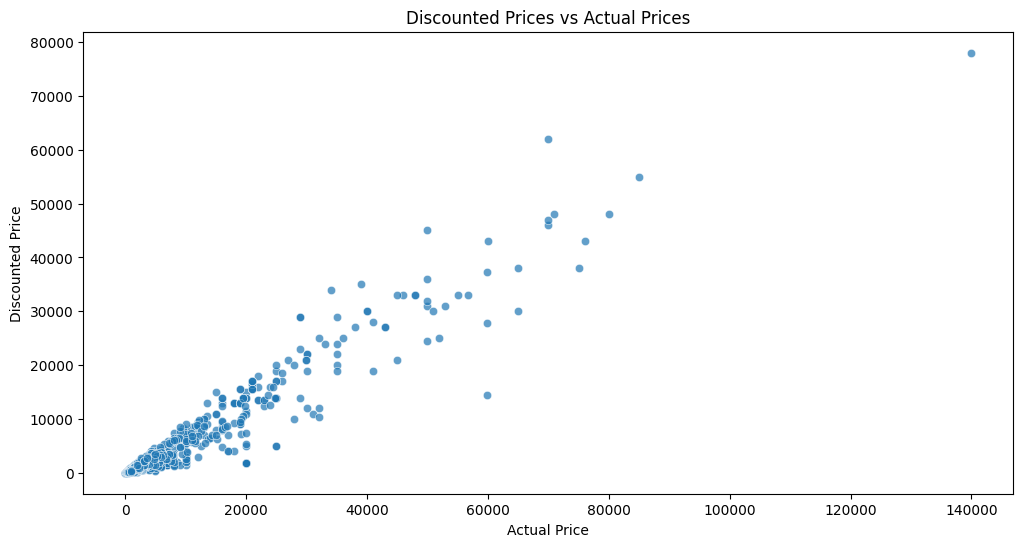

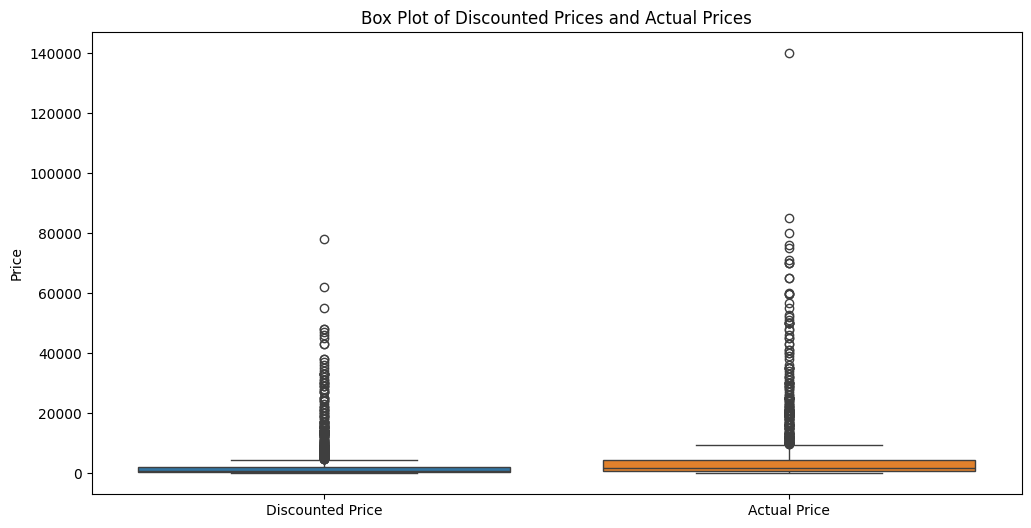

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("amazon.csv")

# Convert price columns to numeric
df['discounted_price'] = df['discounted_price'].replace('[^\d.]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[^\d.]', '', regex=True).astype(float)

# Drop rows with missing or invalid prices
df = df.dropna(subset=['discounted_price', 'actual_price'])

# Plot 1: Histogram of discounted and actual prices
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], bins=30, kde=True, color='blue', label='Discounted Price', alpha=0.6)
sns.histplot(df['actual_price'], bins=30, kde=True, color='green', label='Actual Price', alpha=0.6)
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot 2: Scatter plot to compare discounted and actual prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df, alpha=0.7)
plt.title('Discounted Prices vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

# Plot 3: Box plots for discounted and actual prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['discounted_price', 'actual_price']])
plt.title('Box Plot of Discounted Prices and Actual Prices')
plt.ylabel('Price')
plt.xticks([0, 1], ['Discounted Price', 'Actual Price'])
plt.show()


In [90]:
#4- How does the average discount percentage vary across categories?

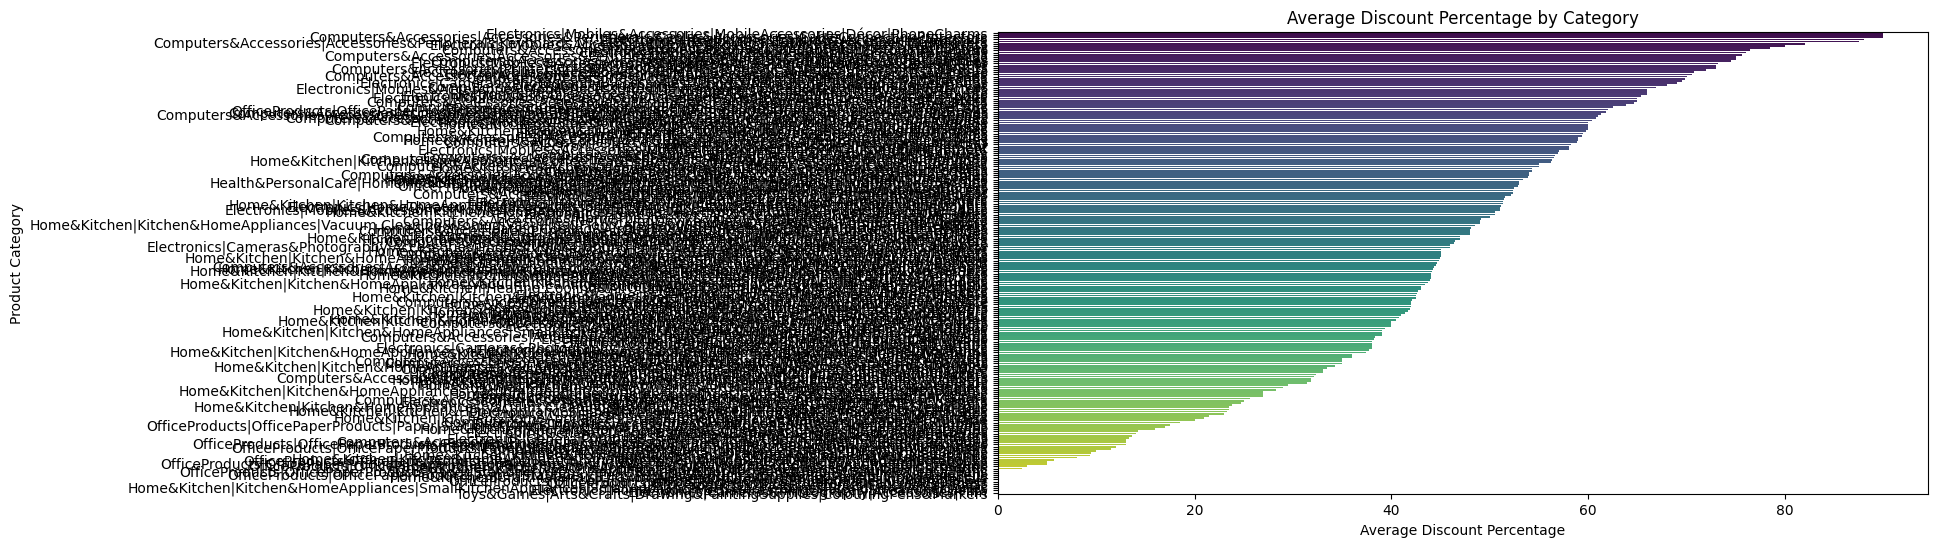

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("amazon.csv")

# Clean the discount_percentage column by removing non-numeric characters (e.g., '%')
df['discount_percentage'] = df['discount_percentage'].replace('[^\d.]', '', regex=True).astype(float)

# Group by category and calculate the average discount percentage
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Sort the categories by average discount percentage
avg_discount_by_category = avg_discount_by_category.sort_values(by='discount_percentage', ascending=False)

# Plot the average discount percentage by category
plt.figure(figsize=(12, 6))
sns.barplot(x='discount_percentage', y='category', data=avg_discount_by_category, palette='viridis')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Product Category')
plt.show()


In [92]:
#5- What are the most popular product names?

In [93]:
df = pd.read_csv("amazon.csv")

# Count reviews by product_name using review_id
product_popularity = df.groupby('product_name')['review_id'].count().reset_index()

# Sort by the count of reviews in descending order
product_popularity = product_popularity.sort_values(by='review_id', ascending=False)

# Show the top 10 most popular products
top_10_products = product_popularity.head(10)

# Display the result
print(top_10_products[['product_name', 'review_id']])

                                           product_name  review_id
384   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...          5
386   Fire-Boltt Phoenix Smart Watch with Bluetooth ...          4
380   Fire-Boltt India's No 1 Smartwatch Brand Talk ...          3
324   Duracell USB C To Lightning Apple Certified (M...          3
390   Fire-Boltt Visionary 1.78" AMOLED Bluetooth Ca...          3
975   Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...          3
84    Amazon Basics USB Type-C to USB-A 2.0 Male Fas...          3
1023  Sounce Fast Phone Charging Cable & Data Sync U...          3
325   Duracell USB Lightning Apple Certified (Mfi) B...          3
1158  Wayona Nylon Braided USB to Lightning Fast Cha...          3


In [94]:
#6- What are the most popular product keywords?

In [95]:
from collections import Counter
import re

# Load the dataset
df = pd.read_csv("amazon.csv")

# Define a list of stopwords
stop_words = set([
    'the', 'and', 'a', 'to', 'of', 'in', 'for', 'on', 'with', 'at', 'by', 
    'an', 'as', 'is', 'this', 'it', 'from', 'that', 'are', 'or', 'be', 
    'your', 'you', 'i', 'we', 'our', 'can', 'not', 'all', 'so', 'have', 
    'will', 'product', 'new', 'best', 'sale', 'discount', 'offer', 'buy'
])

# Function to clean and tokenize product names
def tokenize(text):
    # Remove any non-alphanumeric characters and convert to lowercase
    text = re.sub(r'\W', ' ', text.lower())
    # Split into words and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Tokenize all product names
all_words = []
for product in df['product_name']:
    all_words.extend(tokenize(product))

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top 10 most common keywords
top_keywords = word_counts.most_common(10)

# Display the results
for keyword, count in top_keywords:
    print(f'{keyword}: {count}')


black: 530
usb: 417
cable: 414
1: 413
c: 289
3: 275
2: 267
charging: 247
type: 243
fast: 212


In [96]:
#7- What are the most popular product reviews?

In [97]:
df = pd.read_csv("amazon.csv")

# Convert 'rating_count' to numeric, forcing errors to NaN (if there are non-numeric values)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Group by review_id (or user review) and count the number of ratings or votes
review_popularity = df.groupby(['review_id', 'review_title', 'review_content'])['rating_count'].sum().reset_index()

# Sort reviews by rating_count (or review_count) in descending order
review_popularity = review_popularity.sort_values(by='rating_count', ascending=False)

# Display the top 10 most popular reviews based on rating count
top_reviews = review_popularity.head(10)

# Display the result
print(top_reviews[['review_title', 'review_content', 'rating_count']])


                                           review_title  \
604   Great Cable, Charging Speeds Could Be Better,G...   
20    Good cable for car,Good substitute for orginal...   
742   Good product,Its good, but micro usb doesn't f...   
1195  Used for 10 months,Quality is good,Good Afters...   
379   Nice,Awesome,Quick not charger🤏,Expensive at t...   
1173  Worth it!,Good one,Robust and effective.,Good,...   
541   Value for money,Nice product,timely delivered ...   
530   Decent product,doesn't pick up sand,Ok ok,Must...   
299   Nice .,very good batteries received,Longtevity...   
1005  Kettle is good but bottle is not good quality,...   

                                         review_content  rating_count  
604   Not charging as fast as I'd have expected. May...        2922.0  
20    I trust this product! Works well with car play...        2445.0  
742   Product is good , and also it's  strudiness .B...        1806.0  
1195  Used this cable for 10 months, very sturdy, re...       

In [98]:
#8- What is the correlation between discounted_price and rating?

In [99]:
df = pd.read_csv("amazon.csv")

# Convert 'discounted_price' to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'].replace('[\$,]', '', regex=True), errors='coerce')

# Convert 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = df[['discounted_price', 'rating']].corr()

# Display the correlation matrix
print(correlation)


                  discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     1.0


In [100]:
#9- What are the Top 5 categories based on the highest ratings?

In [101]:
df = pd.read_csv("amazon.csv")

# Convert 'rating' to numeric (if not already)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'category' and calculate the average rating for each category
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()

# Sort by average rating in descending order
category_avg_rating = category_avg_rating.sort_values(by='rating', ascending=False)

# Display the top 5 categories based on highest average rating
top_5_categories = category_avg_rating.head(5)

# Display the result
print(top_5_categories[['category', 'rating']])


                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


In [102]:
#10- Identify any potential areas for improvement or optimization based on the data analysis.

In [103]:
#Discount and Price Strategy:

#Optimize discount strategies by aligning discounted and actual prices with product ratings. Consider dynamic pricing models.

#Rating Improvement:

#Focus on improving products in categories with low ratings, especially those with high volumes of reviews.

#Category-Specific Analysis:

#Enhance product offerings and quality in underperforming categories. Analyze top-rated categories and prioritize improvements in others.

#Keyword and Product Name Optimization:

#Use popular keywords in product titles and descriptions for better discoverability and searchability.

#Review Analysis and Sentiment:

#Conduct sentiment analysis on reviews to highlight positive feedback for marketing and address negative sentiments in product development.

In [104]:
#For Spotify Dataset
#1- Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if necessary.

In [105]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Handle missing values: Example (drop rows with missing values)
df = df.dropna()  # This removes rows with any missing values

# Remove duplicate rows
df = df.drop_duplicates()

# Check if the dataframe is now clean
print(f"Dataframe after cleaning:\n{df.head()}")


Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27
Dataframe after cleaning:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


In [106]:
#2- What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

In [107]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

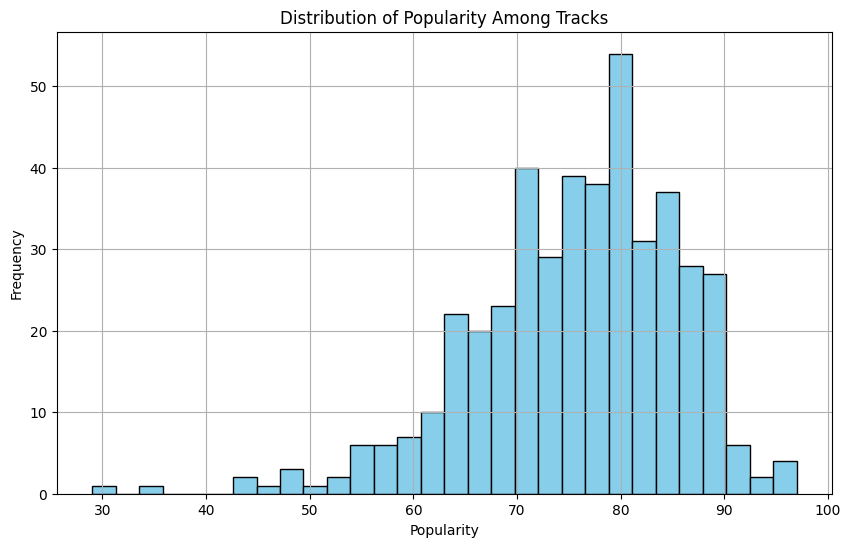

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure 'Popularity' is numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Plot the distribution of popularity using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [109]:
#3- Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

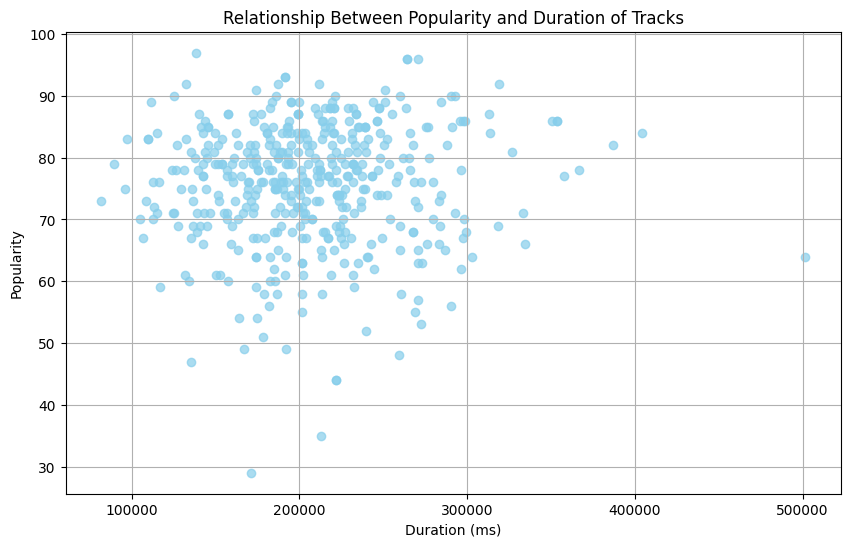

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure 'Popularity' and 'Duration (ms)' are numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')

# Scatter plot to explore the relationship between Popularity and Duration (ms)
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'], color='skyblue', alpha=0.7)
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


In [111]:
#4- Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

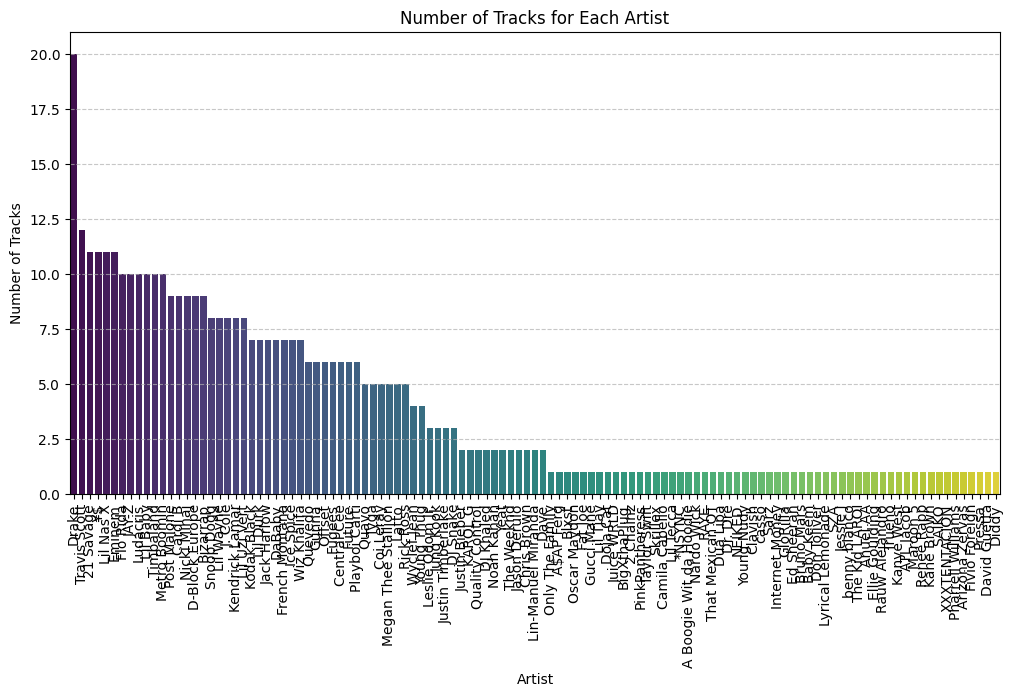

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify.csv")

# Plot countplot to show the number of tracks for each artist
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Artist', order=df['Artist'].value_counts().index, palette='viridis')

# Customizing the plot
plt.title('Number of Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)  # Rotate artist names for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [113]:
#5- What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [114]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure 'Popularity' is numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Sort the dataframe by 'Popularity' in ascending order and select the top 5 least popular tracks
least_popular_tracks = df[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity').head(5)

# Display the result
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [115]:
#6- Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [116]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure 'Popularity' is numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Calculate total popularity for each artist and get the top 5 artists
artist_popularity = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5)

# Calculate the average popularity for each of the top 5 artists
top_5_artists_avg_popularity = df[df['Artist'].isin(artist_popularity.index)] \
    .groupby('Artist')['Popularity'] \
    .mean() \
    .sort_values(ascending=False)

# Display the result
print("Average Popularity for Top 5 Most Popular Artists:")
print(top_5_artists_avg_popularity)


Average Popularity for Top 5 Most Popular Artists:
Artist
Travis Scott    87.000000
¥$              86.090909
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Name: Popularity, dtype: float64


In [117]:
#7- For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [118]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure 'Popularity' is numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Calculate total popularity for each artist and get the top 5 artists
artist_popularity = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5)

# Filter the dataset to include only tracks from the top 5 artists
top_5_artists_tracks = df[df['Artist'].isin(artist_popularity.index)]

# For each artist, find their most popular track
most_popular_tracks = top_5_artists_tracks.loc[top_5_artists_tracks.groupby('Artist')['Popularity'].idxmax()]

# Display the artist name and their most popular track
result = most_popular_tracks[['Artist', 'Track Name']]
print(result)


           Artist                               Track Name
70      21 Savage                                   redrum
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)
80         Eminem                               Without Me
30   Travis Scott               FE!N (feat. Playboi Carti)
260            ¥$                                 CARNIVAL


In [119]:
#8- Visualize relationships between multiple numerical variables simultaneously using a pair plot.

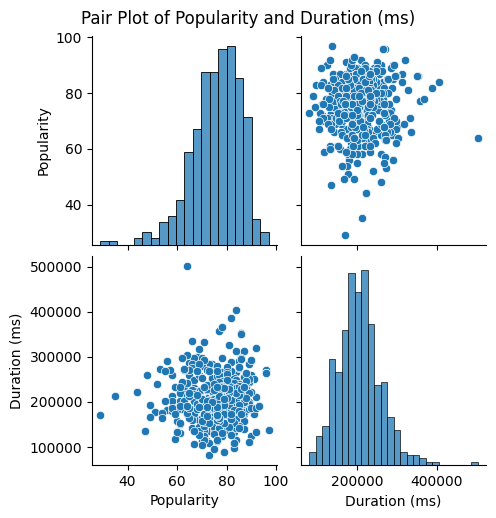

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure numerical columns are in correct format
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')

# Select relevant numerical columns for pairplot
numerical_columns = ['Popularity', 'Duration (ms)']

# Create a pairplot to visualize relationships between numerical variables
sns.pairplot(df[numerical_columns].dropna())  # dropna to exclude rows with missing values

# Display the plot
plt.suptitle('Pair Plot of Popularity and Duration (ms)', y=1.02)
plt.show()


In [121]:
#9- Does duration of tracks vary significantly across different artists?Explore this visually using a box plot or violin plot.

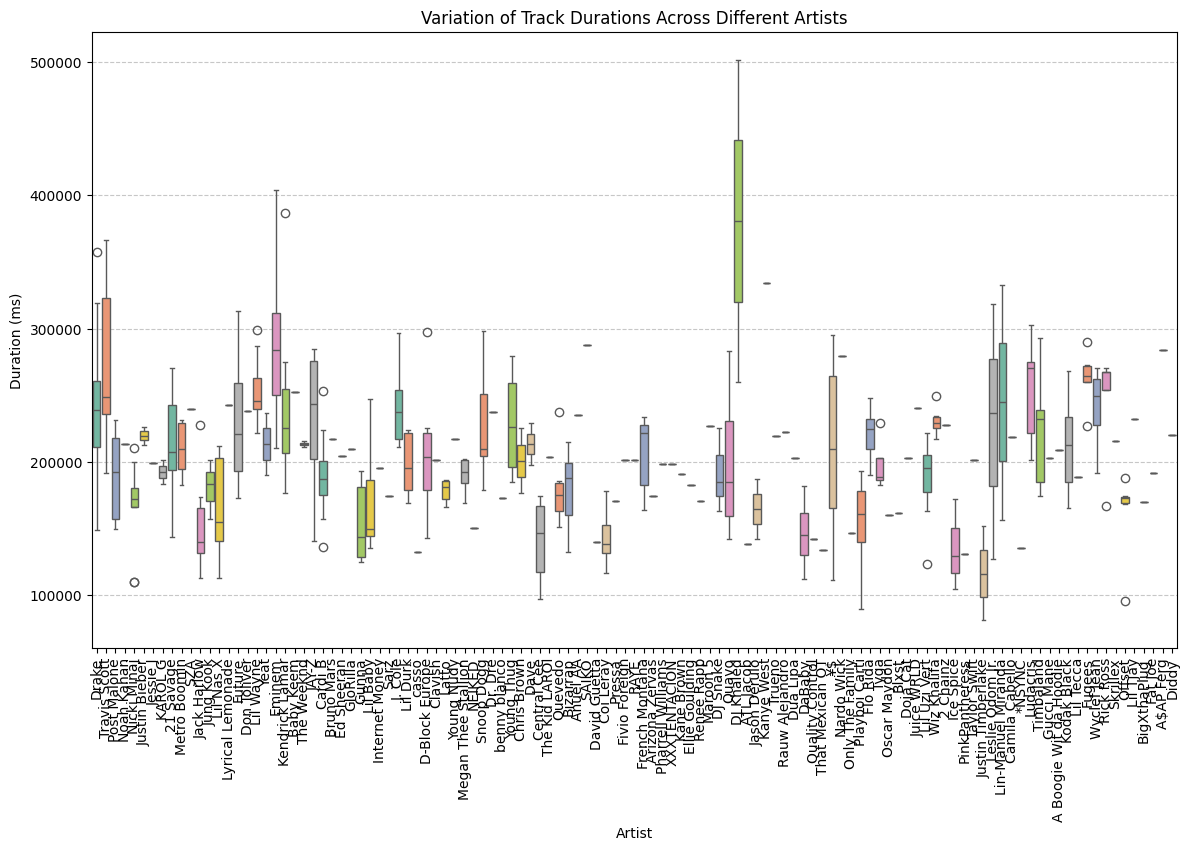

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure 'Duration (ms)' is numeric
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')

# Box plot to show variation in track durations across artists
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette='Set2')

# Customizing the plot
plt.title('Variation of Track Durations Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)  # Rotate artist names for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [123]:
#10- How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

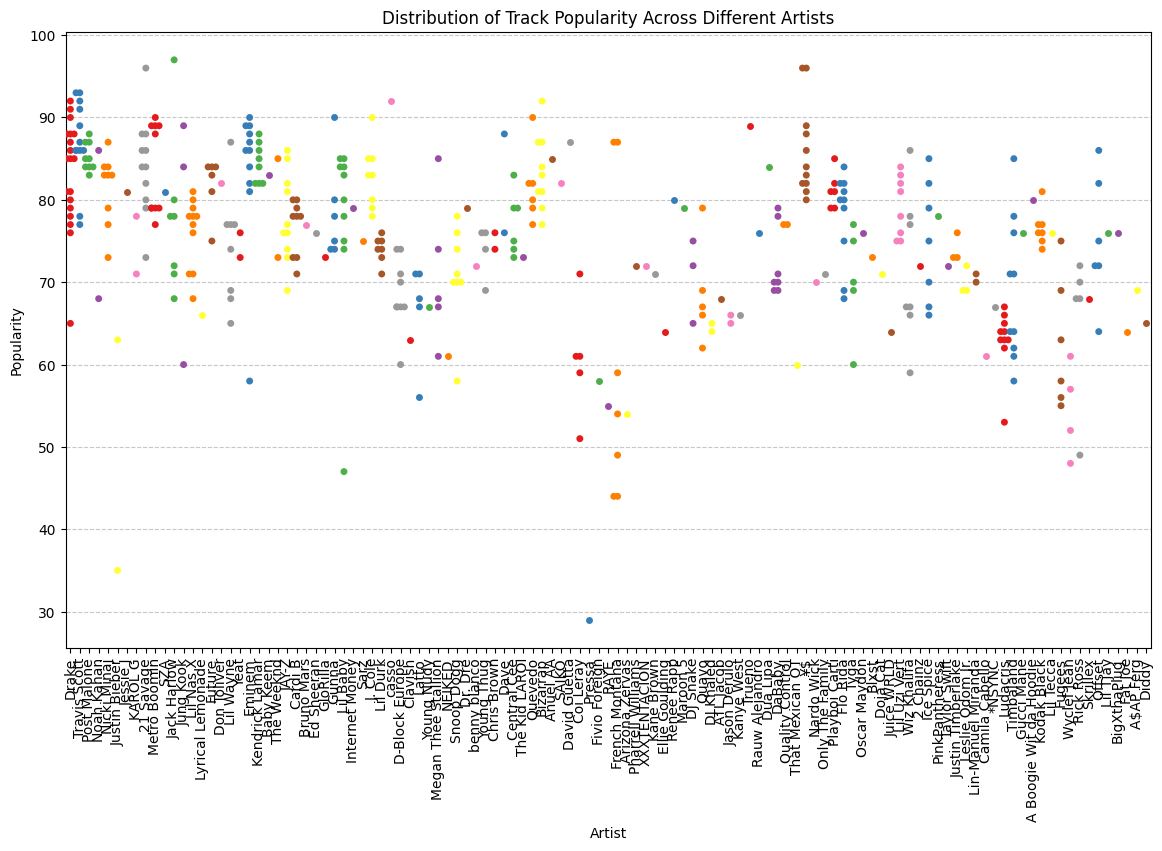

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spotify.csv")

# Ensure 'Popularity' is numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Swarm plot to show distribution of track popularity across artists
plt.figure(figsize=(14, 8))
sns.swarmplot(data=df, x='Artist', y='Popularity', palette='Set1', size=5)

# Customizing the plot
plt.title('Distribution of Track Popularity Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate artist names for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()